<a href="https://colab.research.google.com/github/vedanthshenoy/Telecom-Churn-and-Customer-Clustering/blob/main/clustering_customers_diff_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_csv('customerdata.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
target=data[['Churn']]
target.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
target=le.fit_transform(target)
target=pd.DataFrame(target,columns=['target'])
target.head()

C:\Users\User\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,target
0,0
1,0
2,1
3,0
4,1


In [ ]:
data.drop(['customerID','Churn','TotalCharges'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le=LabelEncoder()
cat_cols=data.select_dtypes(exclude=['int','float']).columns
enc_data=list(cat_cols)
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data[enc_data].head()

# scale=StandardScaler()
# datas=scale.fit_transform(data)
# data_df=pd.DataFrame(datas)
# data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2


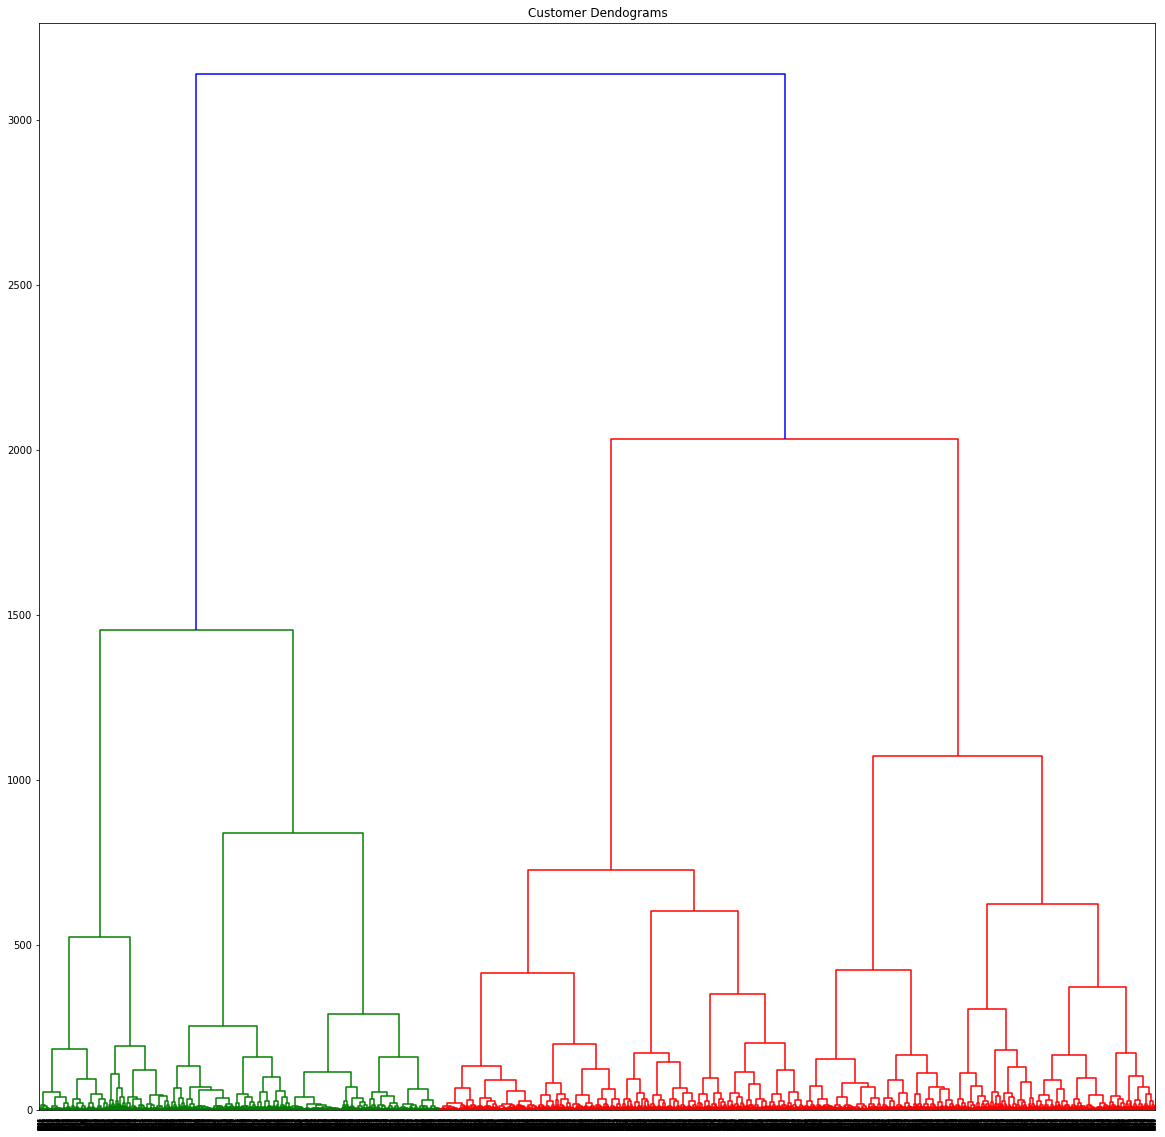

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
target=cluster.fit_predict(data)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
model=KMeans(n_clusters=4)
model.fit(data)
targetKMeans=np.array(model.labels_)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca=PCA(n_components=2)
pc=pca.fit_transform(data)
pdf=pd.DataFrame(data=pc,columns=['principal component 1','principal component 2'])
pdf.head()

,principal component 1,principal component 2
0,-44.969663,-13.478652
1,-6.410676,4.788827
2,-22.871082,-22.822971
3,-14.911131,21.048155
4,-7.652566,-30.052040


In [ ]:
finalDf=pd.concat([pdf,pd.DataFrame(target,columns=['target'])],axis=1)
finalDf.head()

,principal component 1,principal component 2,target
0,-44.969663,-13.478652,1
1,-6.410676,4.788827,2
2,-22.871082,-22.822971,1
3,-14.911131,21.048155,0
4,-7.652566,-30.052040,2


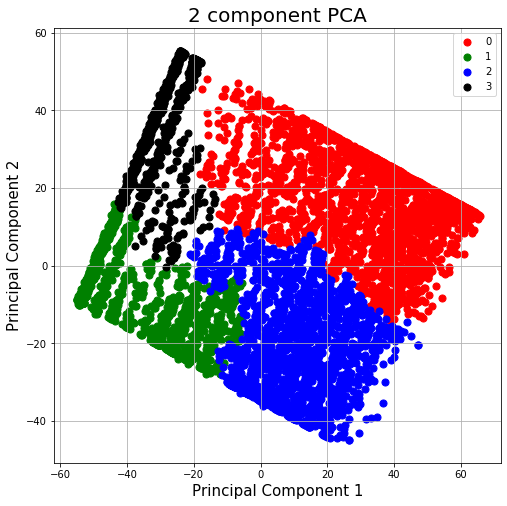

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
finalDfKM=pd.concat([pdf,pd.DataFrame(targetKMeans,columns=['targetKMeans'])],axis=1)
finalDfKM.head()

,principal component 1,principal component 2,targetKMeans
0,-44.969663,-13.478652,1
1,-6.410676,4.788827,3
2,-22.871082,-22.822971,1
3,-14.911131,21.048155,3
4,-7.652566,-30.052040,0


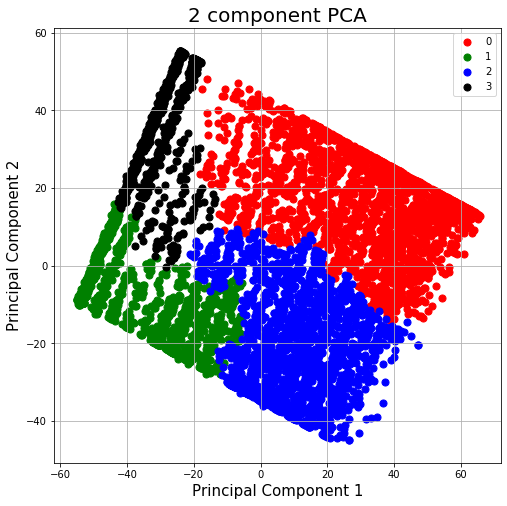

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3]
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()